In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

# Import time and datetime
import time
from datetime import datetime

In [2]:
# Starting URL for Weather Map Api Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)


In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    # Groupd cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | semirom
Processing Record 2 of Set 1 | garissa
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | mattru
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | svetlogorsk
Processing Record 8 of Set 1 | bonthe
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | beringovskiy
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 1 | beckley
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | payakumbuh
Processing Record 16 of Set 1 | itupeva
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | alta flores

Processing Record 38 of Set 4 | mayo
Processing Record 39 of Set 4 | avarua
Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | carmelo
Processing Record 44 of Set 4 | cabedelo
Processing Record 45 of Set 4 | palau
Processing Record 46 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 4 | mackay
Processing Record 48 of Set 4 | lavrentiya
Processing Record 49 of Set 4 | san javier
Processing Record 50 of Set 4 | port elizabeth
Processing Record 1 of Set 5 | inongo
Processing Record 2 of Set 5 | kapaa
Processing Record 3 of Set 5 | shubarshi
Processing Record 4 of Set 5 | zachagansk
City not found. Skipping...
Processing Record 5 of Set 5 | hobyo
Processing Record 6 of Set 5 | muttenz
Processing Record 7 of Set 5 | cape town
Processing Record 8 of Set 5 | roma
Processing Record 9 of Set 5 | nchelenge
Processing Record 10 of Set 5 |

Processing Record 21 of Set 8 | cherkasskoye
Processing Record 22 of Set 8 | lichtenburg
Processing Record 23 of Set 8 | the valley
Processing Record 24 of Set 8 | mahanoro
Processing Record 25 of Set 8 | hoquiam
Processing Record 26 of Set 8 | esil
Processing Record 27 of Set 8 | dois vizinhos
Processing Record 28 of Set 8 | lubango
Processing Record 29 of Set 8 | niquero
Processing Record 30 of Set 8 | asosa
Processing Record 31 of Set 8 | rawson
Processing Record 32 of Set 8 | kijang
Processing Record 33 of Set 8 | seoul
Processing Record 34 of Set 8 | charters towers
Processing Record 35 of Set 8 | mezen
Processing Record 36 of Set 8 | helmstedt
Processing Record 37 of Set 8 | badou
Processing Record 38 of Set 8 | marrakesh
Processing Record 39 of Set 8 | iqaluit
Processing Record 40 of Set 8 | tekeli
Processing Record 41 of Set 8 | hasaki
Processing Record 42 of Set 8 | phulabani
Processing Record 43 of Set 8 | erenhot
Processing Record 44 of Set 8 | mogadouro
Processing Record 45

Processing Record 6 of Set 12 | aguimes
Processing Record 7 of Set 12 | ca mau
Processing Record 8 of Set 12 | poya
Processing Record 9 of Set 12 | verkhnyaya maksakovka
Processing Record 10 of Set 12 | cowra
Processing Record 11 of Set 12 | yurla
Processing Record 12 of Set 12 | hearst
Processing Record 13 of Set 12 | qurayyat
Processing Record 14 of Set 12 | haines junction
Processing Record 15 of Set 12 | beloha
Processing Record 16 of Set 12 | ponta delgada
Processing Record 17 of Set 12 | antofagasta
Processing Record 18 of Set 12 | chumikan
Processing Record 19 of Set 12 | nipawin
Processing Record 20 of Set 12 | amderma
City not found. Skipping...
Processing Record 21 of Set 12 | cruzeiro do sul
Processing Record 22 of Set 12 | camopi
Processing Record 23 of Set 12 | grindavik
Processing Record 24 of Set 12 | severo-yeniseyskiy
Processing Record 25 of Set 12 | narsaq
Processing Record 26 of Set 12 | islahiye
Processing Record 27 of Set 12 | klyuchevskiy
Processing Record 28 of S

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Semirom,31.4167,51.5667,81.03,10,0,8.19,IR,2022-07-25 15:00:20
1,Garissa,-0.4536,39.6401,84.85,40,77,23.78,KE,2022-07-25 15:00:20
2,Cherskiy,68.7500,161.3000,41.29,74,3,9.40,RU,2022-07-25 15:00:21
3,Mattru,7.6244,-11.8332,80.73,69,100,6.40,SL,2022-07-25 15:00:21
4,Kaitangata,-46.2817,169.8464,46.00,90,100,16.71,NZ,2022-07-25 15:00:22
5,Svetlogorsk,52.6333,29.7333,69.82,65,69,10.63,BY,2022-07-25 15:00:22
6,Bonthe,7.5264,-12.5050,80.49,68,100,12.64,SL,2022-07-25 15:00:23
7,Mataura,-46.1927,168.8643,44.47,90,100,11.52,NZ,2022-07-25 15:00:23
8,Beringovskiy,63.0500,179.3167,44.92,75,100,7.05,RU,2022-07-25 15:00:24
9,Port Alfred,-33.5906,26.8910,61.18,67,0,4.00,ZA,2022-07-25 15:00:24


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Semirom,IR,2022-07-25 15:00:20,31.4167,51.5667,81.03,10,0,8.19
1,Garissa,KE,2022-07-25 15:00:20,-0.4536,39.6401,84.85,40,77,23.78
2,Cherskiy,RU,2022-07-25 15:00:21,68.7500,161.3000,41.29,74,3,9.40
3,Mattru,SL,2022-07-25 15:00:21,7.6244,-11.8332,80.73,69,100,6.40
4,Kaitangata,NZ,2022-07-25 15:00:22,-46.2817,169.8464,46.00,90,100,16.71
...,...,...,...,...,...,...,...,...,...
548,Batemans Bay,AU,2022-07-25 15:15:40,-35.7167,150.1833,55.09,78,94,5.37
549,Bontang,ID,2022-07-25 15:15:40,0.1333,117.5000,77.59,87,41,5.37
550,Kualakapuas,ID,2022-07-25 15:15:40,-3.0091,114.3876,73.29,89,68,2.91
551,Rincon,US,2022-07-25 15:15:41,32.2960,-81.2354,89.85,65,40,11.50


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

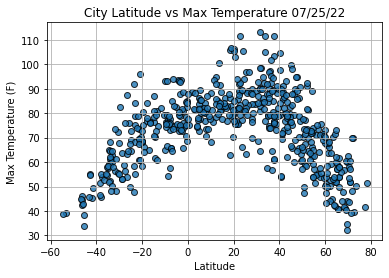

In [20]:
# Import the time module
import time

# Build the scatter plot for lat vs. max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the fig
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

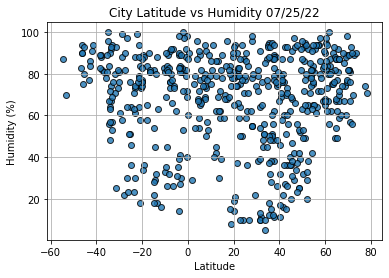

In [21]:
# Build the scatter plot for lat vs. max temp
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the fig
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

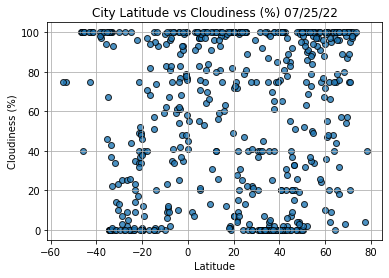

In [22]:
# Build the scatter plot for lat vs. max temp
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the fig
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

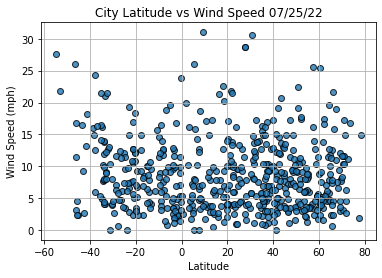

In [23]:
# Build the scatter plots for lat vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the fig
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation w/ the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line y values from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation out of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                      Itupeva
Country                        BR
Date          2022-07-25 15:00:25
Lat                      -23.1531
Lng                      -47.0578
Max Temp                    84.04
Humidity                       30
Cloudiness                     35
Wind Speed                   2.86
Name: 13, dtype: object

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Semirom,IR,2022-07-25 15:00:20,31.4167,51.5667,81.03,10,0,8.19
2,Cherskiy,RU,2022-07-25 15:00:21,68.7500,161.3000,41.29,74,3,9.40
3,Mattru,SL,2022-07-25 15:00:21,7.6244,-11.8332,80.73,69,100,6.40
5,Svetlogorsk,BY,2022-07-25 15:00:22,52.6333,29.7333,69.82,65,69,10.63
6,Bonthe,SL,2022-07-25 15:00:23,7.5264,-12.5050,80.49,68,100,12.64


In [27]:
# Create northern and southern hemi DF
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

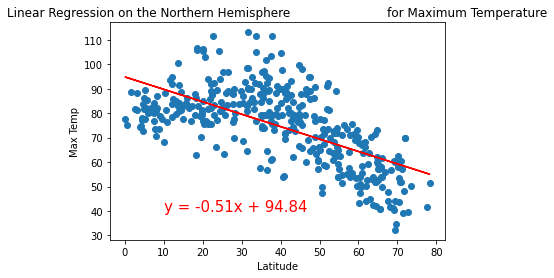

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

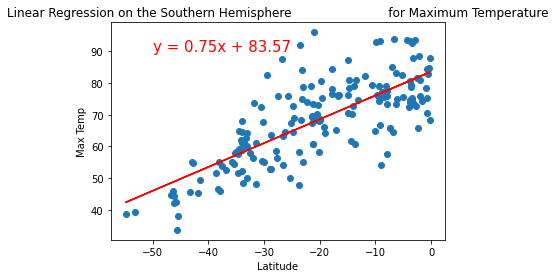

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

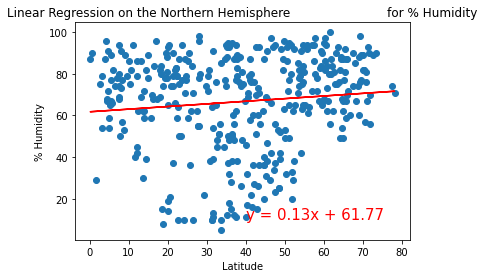

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

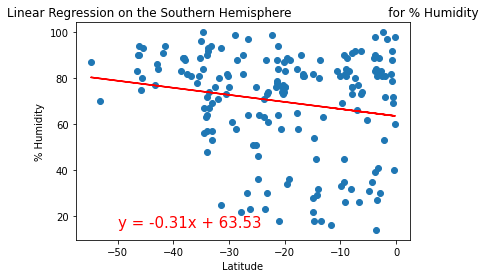

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


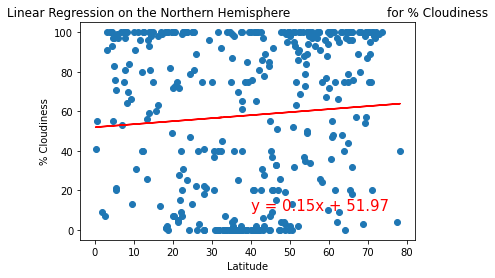

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

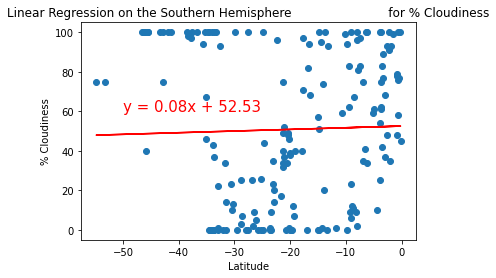

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

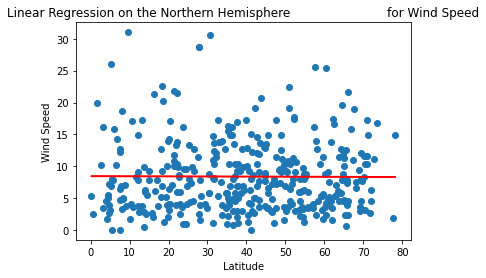

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

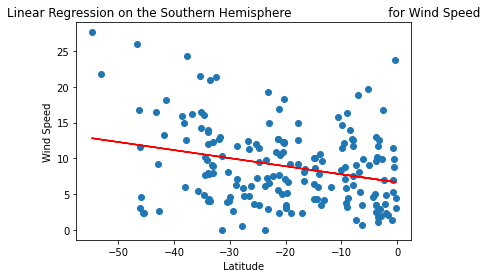

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))